# Analysis of Corruption Index
By Harshal Patel, Sabrina Almazan, Isis Kazadi, Katie Rink

In [193]:
#imports
import pandas as pd
import numpy as np

### Creating Datasets
Here we will write a brief description of the data sets

In [194]:
#Read in Datas
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)

### Clean Data
Explain decisions we made about countries

In [195]:
#Only include chosen countries
CorruptData = CorruptData[CorruptData['Country'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include chosen years
CorruptData = CorruptData.filter(regex='2013|2014|2015|2016|2017|2018|2019|2020|Country')
#Only looking at CPI score
CorruptData = CorruptData.filter(regex='Country|CPI')

#Correct Indexes
CorruptData = CorruptData.reset_index()

#Make header years only
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI Score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace(' ', ''))

#Create new dataset making year and country columns to graph
modified = CorruptData.filter(['Country'], axis=1)
modified = pd.concat([modified]*5, ignore_index=True)
modified = modified.sort_values(by='Country')
modified.insert(1, 'Year', [2013, 2014, 2015, 2016, 2017]*5)
modified['CPI Score'] = ''

for index, row in modified.iterrows():
    modified.set_value(index,'CPI Score', CorruptData.loc[CorruptData['Country'] == row['Country']][str(row['Year'])].values[0])

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### Corruption Index Analysis
Explain what trends we saw in corruption levels

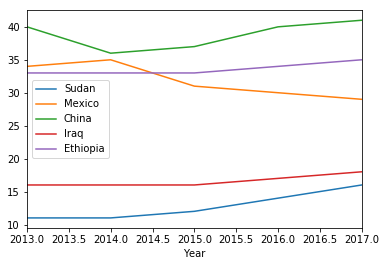

In [202]:
#Plot Each Country over year of CPI
#Datasets based on Country
SudanData = modified[modified['Country'].isin(['Sudan'])]
MexicoData = modified[modified['Country'].isin(['Mexico'])]
ChinaData = modified[modified['Country'].isin(['China'])]
IraqData = modified[modified['Country'].isin(['Iraq'])]
EthiopiaData = modified[modified['Country'].isin(['Ethiopia'])]


#Plot Prices over years based on category
ax = SudanData.plot(x='Year', y='CPI Score')
ax = MexicoData.plot(ax=ax, x='Year', y='CPI Score')
ax = ChinaData.plot(ax=ax, x='Year', y='CPI Score')
ax = IraqData.plot(ax=ax, x='Year', y='CPI Score')
EthiopiaData.plot(ax=ax, x='Year', y='CPI Score')
ax.legend(["Sudan", "Mexico", "China", "Iraq", "Ethiopia"]);